In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [2]:
df = pd.read_csv("D:/yellow-taxy-nyc/Data/final_dataset.csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,manhattan_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-09-14 10:25:20,2015-09-14 10:29:52,2,0.67,-73.96322,40.762240,1,N,-73.970955,40.758186,0.011789,1,5.0,0.0,0.5,1.16,0.0,0.3,6.96
1,2,2015-09-03 07:10:14,2015-09-03 07:21:52,1,0.83,-73.98021,40.763885,1,N,-73.971930,40.757280,0.014885,2,8.5,1.0,0.5,0.00,0.0,0.3,10.30
2,2,2015-09-03 07:49:18,2015-09-03 08:08:52,1,4.62,-73.98390,40.749416,1,N,-74.014010,40.708020,0.071506,2,17.5,0.0,0.5,0.00,0.0,0.3,18.30
3,2,2015-09-12 08:47:54,2015-09-12 08:53:46,5,1.00,-73.98894,40.691635,1,N,-73.989550,40.702393,0.011368,2,6.0,0.0,0.5,0.00,0.0,0.3,6.80
4,1,2015-09-10 07:20:41,2015-09-10 07:25:59,1,0.90,-73.99304,40.722736,1,N,-74.006950,40.727306,0.018480,1,6.0,0.0,0.5,1.35,0.0,0.3,8.15


In [3]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.drop('RateCodeID', axis = 1, inplace=True)

In [5]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
manhattan_distance              float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [6]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,manhattan_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000
mean,1.524621,1.624080,4.212495,-73.975221,40.755177,-73.976583,40.754061,0.036063,1.347530,11.101416,0.000488,0.499815,1.511749,0.186168,0.299003,13.599572
std,0.499395,1.340347,773.530933,0.029271,0.024796,0.028368,0.025470,0.034973,0.485771,7.499416,0.019492,0.014196,2.732859,1.023866,0.017718,9.530202
min,1.000000,1.000000,0.000000,-74.423580,40.115902,-74.450960,40.115902,0.000000,1.000000,-6.500000,0.000000,-0.500000,0.000000,0.000000,-0.300000,-7.300000
25%,1.000000,1.000000,0.930000,-73.991270,40.741890,-73.991600,40.741856,0.015110,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,7.880000
50%,2.000000,1.000000,1.500000,-73.980194,40.756466,-73.979740,40.755913,0.024855,1.000000,9.000000,0.000000,0.500000,1.200000,0.000000,0.300000,10.800000
75%,2.000000,1.000000,2.600000,-73.964470,40.770996,-73.968820,40.766750,0.042780,2.000000,13.000000,0.000000,0.500000,2.080000,0.000000,0.300000,15.800000
max,2.000000,6.000000,318000.000000,-72.449425,41.162262,-72.449425,41.159280,0.872401,4.000000,142.500000,2.500000,3.000000,800.000000,59.750000,0.300000,831.300000


## Continuous variables

In [9]:
continius = df.copy(deep=True).select_dtypes(include = ["int64","float64"])
continius.drop(["VendorID","payment_type"],axis = 1, inplace = True)

C:\Users\tiotr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


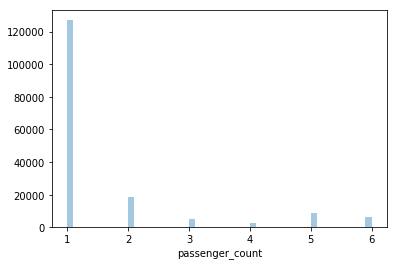

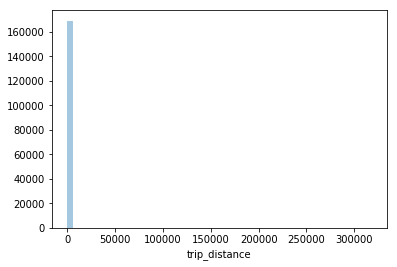

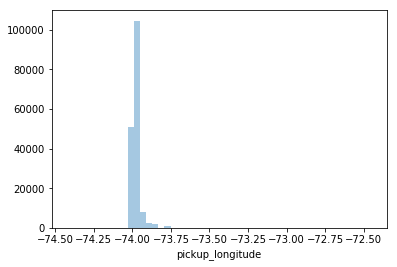

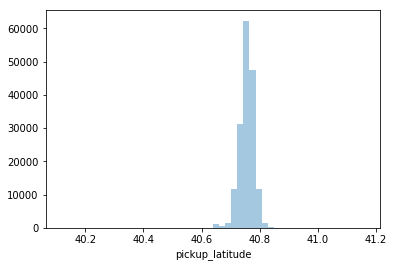

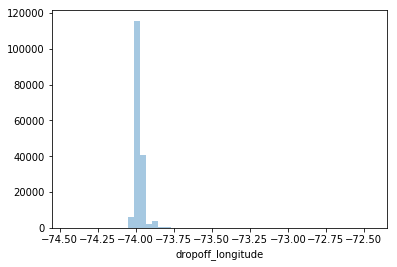

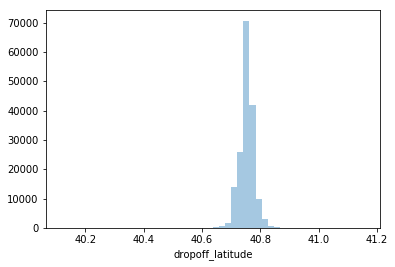

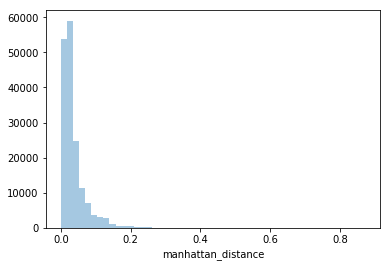

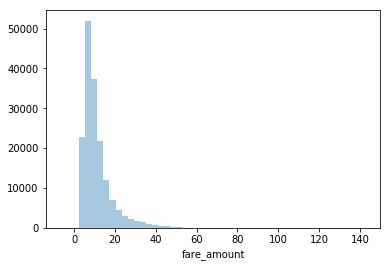

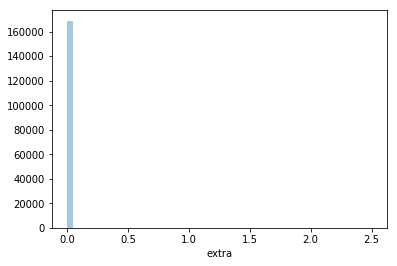

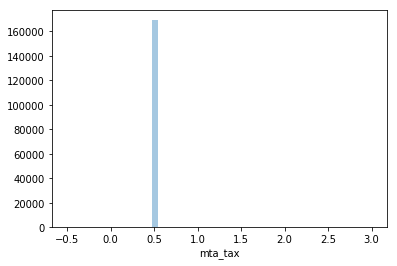

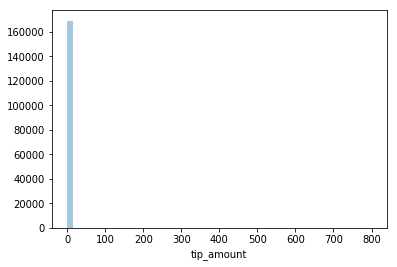

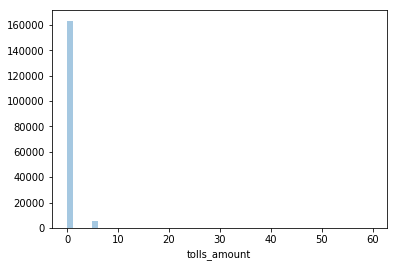

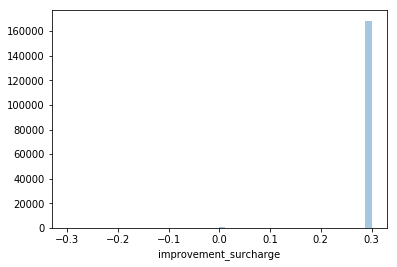

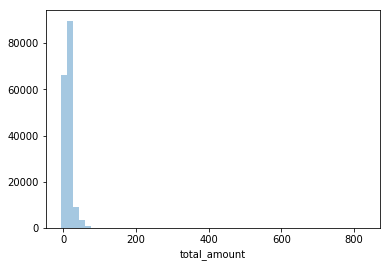

In [14]:
for i in continius.columns:
    sns.distplot(continius[i],kde=False)
    plt.show()

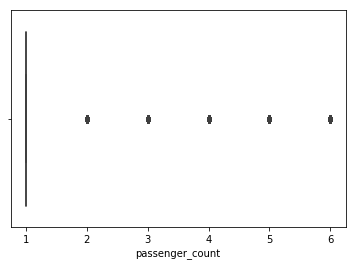

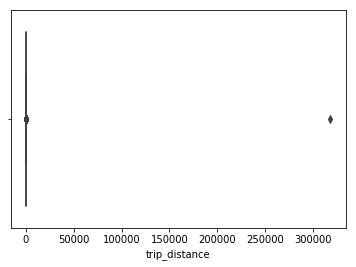

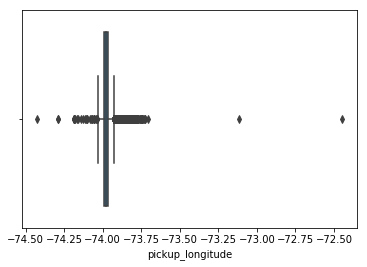

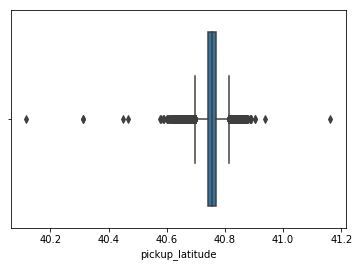

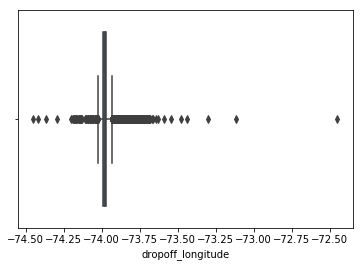

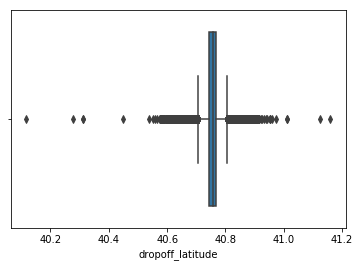

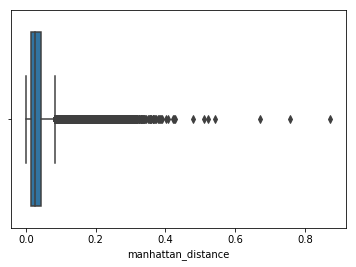

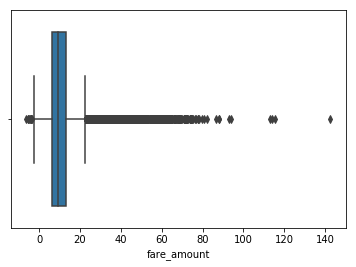

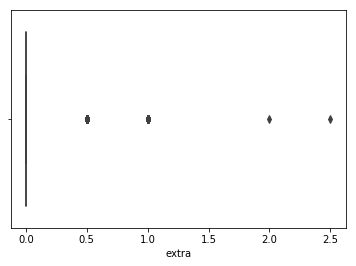

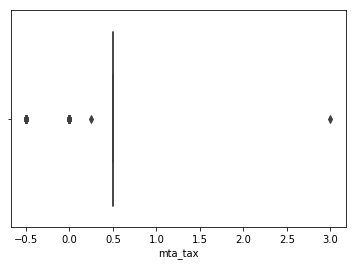

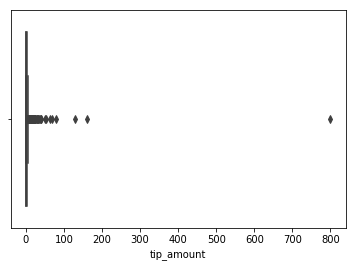

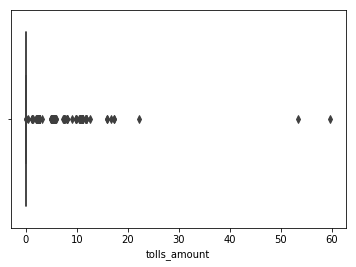

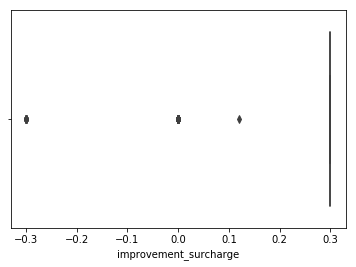

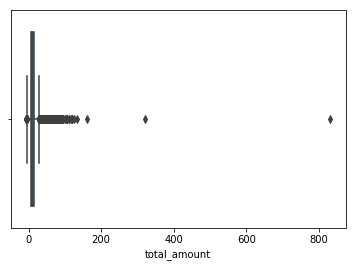

In [15]:
for i in continius.columns:
    sns.boxplot(x=i, data=continius)
    plt.show()


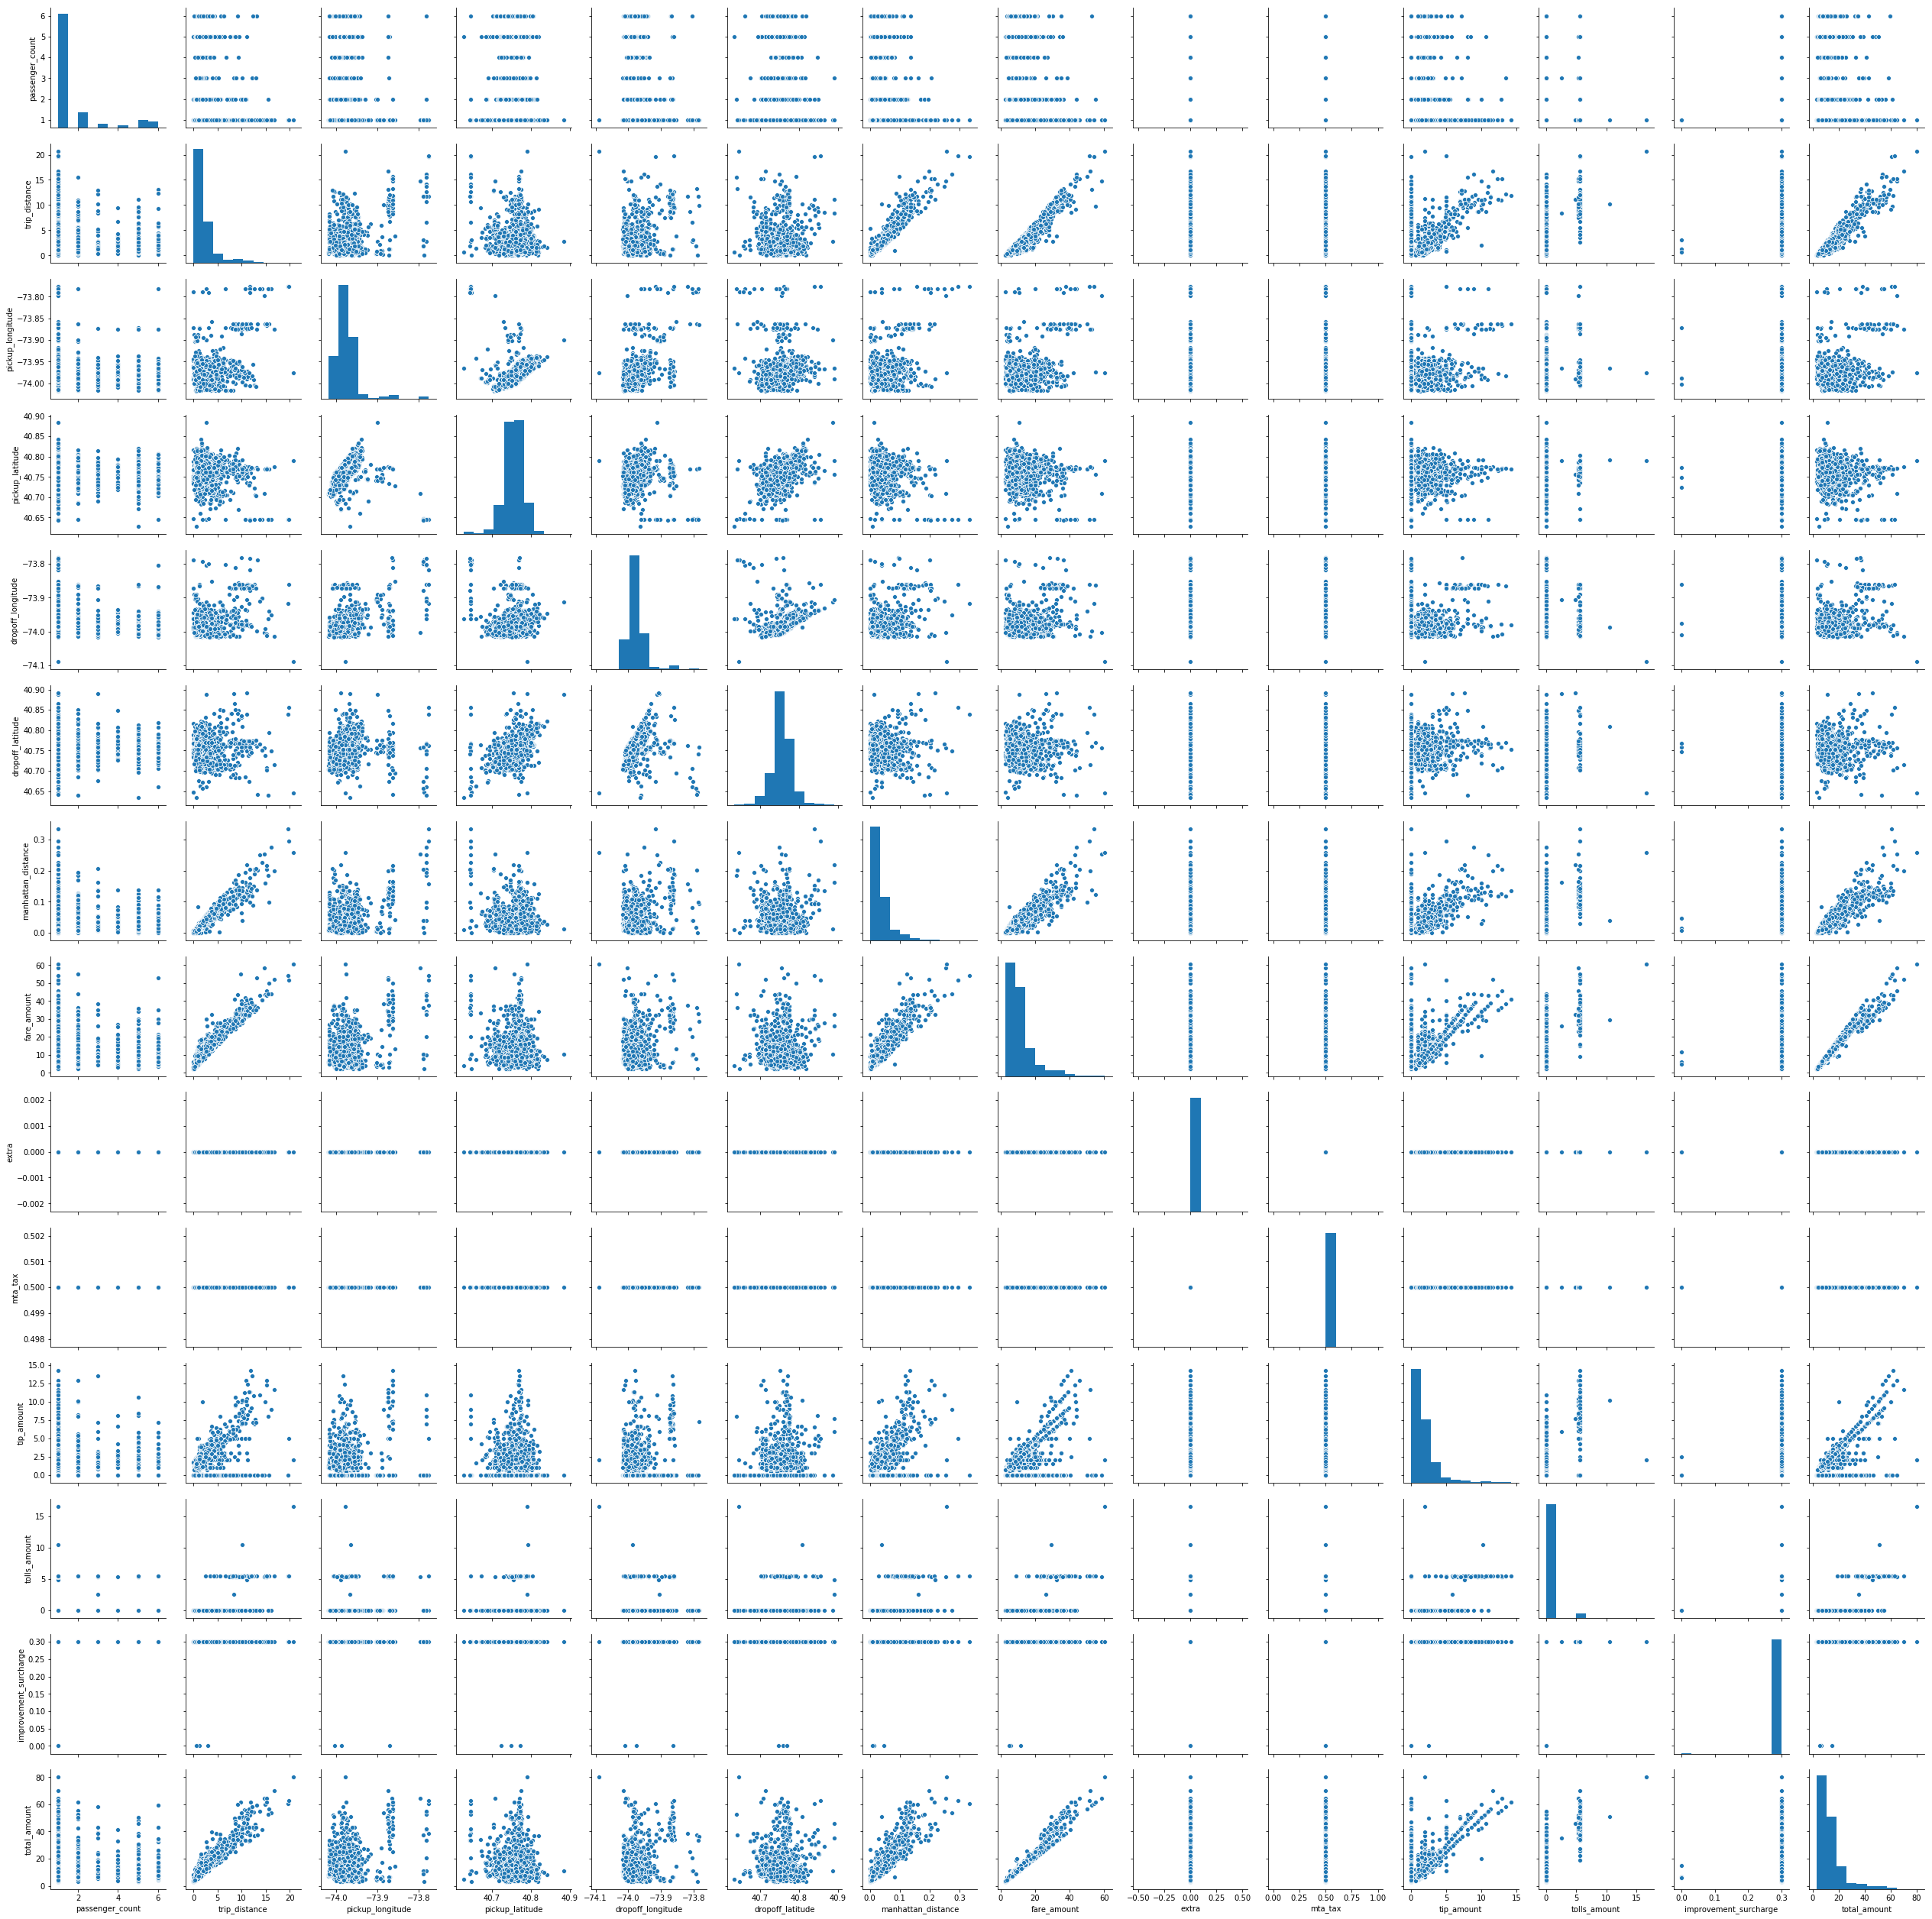

In [10]:
sns.pairplot(continius.sample(2000, random_state= 1))

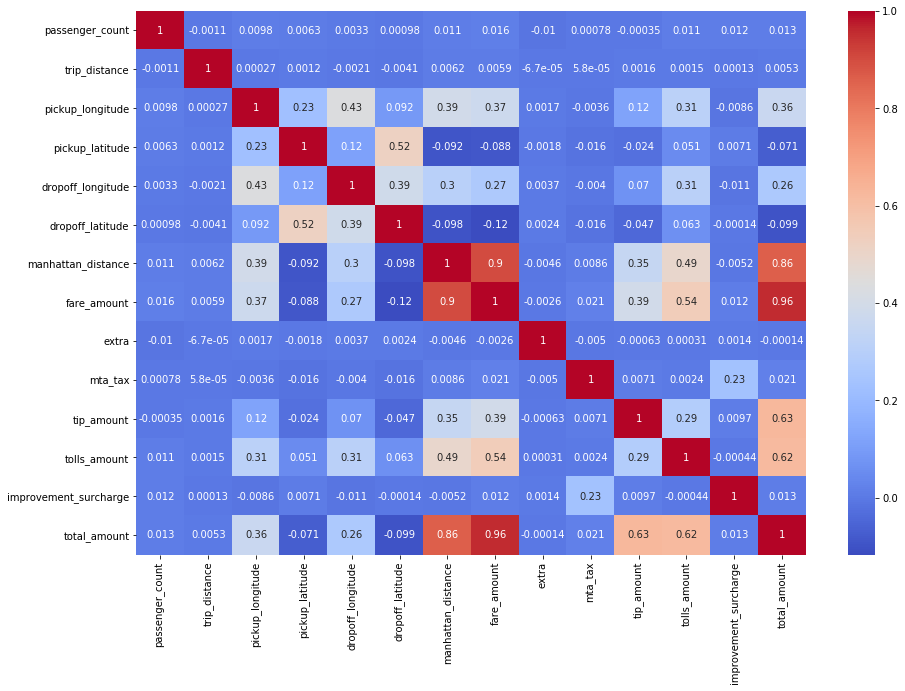

In [24]:
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(continius.corr(),cmap='coolwarm',annot=True)

## Factor variables

In [17]:
factor = df.copy(deep=True)[['VendorID','store_and_fwd_flag','payment_type']]

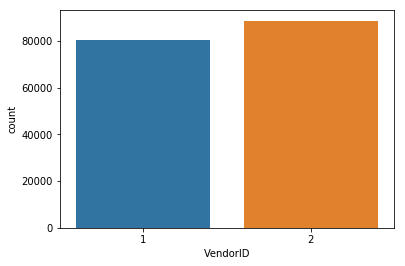

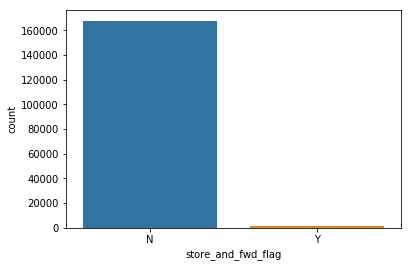

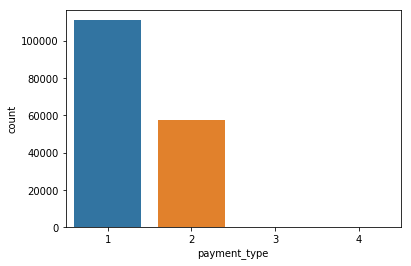

In [18]:
for i in factor.columns:
    sns.countplot(x=i,data=factor)
    plt.show()

## Feature Engineer

In [16]:
df1 = df.copy(deep=True)
df1.drop(['tpep_dropoff_datetime','store_and_fwd_flag','fare_amount','extra','mta_tax','tip_amount','improvement_surcharge','trip_distance'],axis = 1, inplace = True)

In [32]:
df1["pickup_day"] = df1["tpep_pickup_datetime"].dt.day
df1["pickup_month"] = df1["tpep_pickup_datetime"].dt.month
df1["pickup_hour"] = df1["tpep_pickup_datetime"].dt.hour
df1["pickup_day_name"] = df1["tpep_pickup_datetime"].dt.day_name()

In [103]:
df1.head()

,VendorID,tpep_pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,manhattan_distance,payment_type,tolls_amount,total_amount,pickup_day,pickup_month,pickup_hour,pickup_day_name
0,2,2015-09-14 10:25:20,2,-73.96322,40.762240,-73.970955,40.758186,0.011789,1,0.0,6.96,14,9,10,Monday
1,2,2015-09-03 07:10:14,1,-73.98021,40.763885,-73.971930,40.757280,0.014885,2,0.0,10.30,3,9,7,Thursday
2,2,2015-09-03 07:49:18,1,-73.98390,40.749416,-74.014010,40.708020,0.071506,2,0.0,18.30,3,9,7,Thursday
3,2,2015-09-12 08:47:54,5,-73.98894,40.691635,-73.989550,40.702393,0.011368,2,0.0,6.80,12,9,8,Saturday
4,1,2015-09-10 07:20:41,1,-73.99304,40.722736,-74.006950,40.727306,0.018480,1,0.0,8.15,10,9,7,Thursday


In [37]:
df1.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,manhattan_distance,payment_type,tolls_amount,total_amount,pickup_day,pickup_month,pickup_hour
count,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000,169004.000000
mean,1.524621,1.624080,-73.975221,40.755177,-73.976583,40.754061,0.036063,1.347530,0.186168,13.599572,15.562075,6.483373,8.488107
std,0.499395,1.340347,0.029271,0.024796,0.028368,0.025470,0.034973,0.485771,1.023866,9.530202,8.646238,3.447015,1.062635
min,1.000000,1.000000,-74.423580,40.115902,-74.450960,40.115902,0.000000,1.000000,0.000000,-7.300000,1.000000,1.000000,7.000000
25%,1.000000,1.000000,-73.991270,40.741890,-73.991600,40.741856,0.015110,1.000000,0.000000,7.880000,8.000000,3.000000,8.000000
50%,2.000000,1.000000,-73.980194,40.756466,-73.979740,40.755913,0.024855,1.000000,0.000000,10.800000,15.000000,6.000000,8.000000
75%,2.000000,1.000000,-73.964470,40.770996,-73.968820,40.766750,0.042780,2.000000,0.000000,15.800000,23.000000,9.000000,9.000000
max,2.000000,6.000000,-72.449425,41.162262,-72.449425,41.159280,0.872401,4.000000,59.750000,831.300000,31.000000,12.000000,10.000000


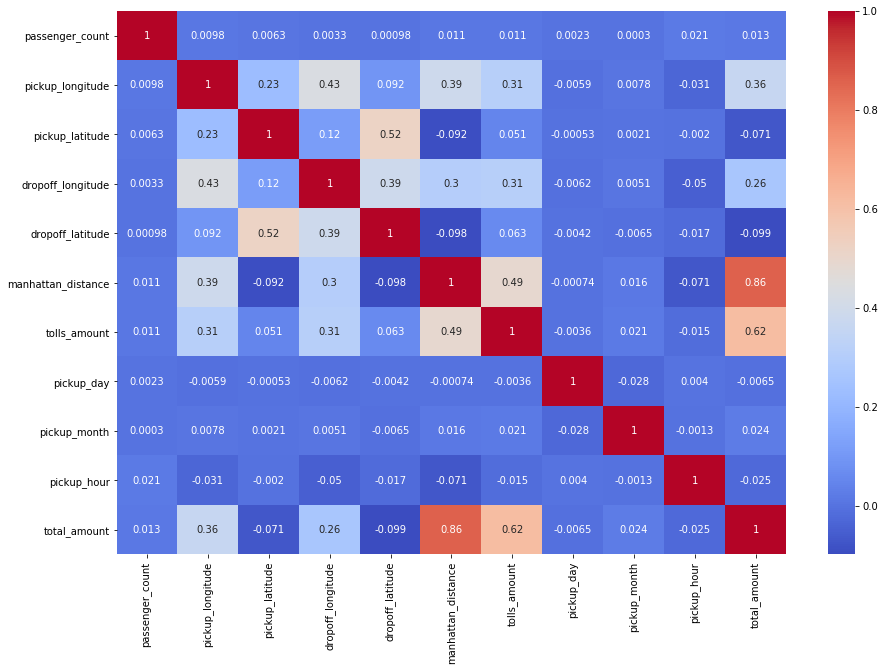

In [36]:
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(df1[["passenger_count","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","manhattan_distance","tolls_amount","pickup_day","pickup_month","pickup_hour","total_amount"]].corr(),cmap='coolwarm',annot=True)

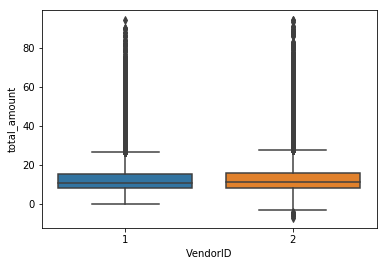

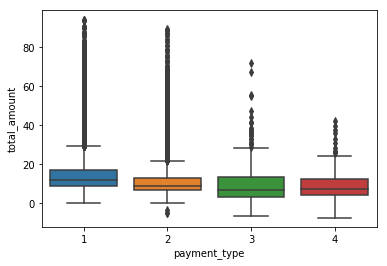

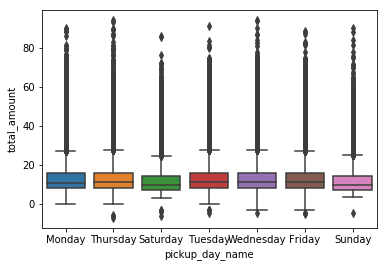

In [79]:
df1_factor = df1[["VendorID","payment_type","pickup_day_name"]]
for i in df1_factor.columns:
    sns.boxplot(x=i, y=df1["total_amount"], data=df1_factor[df1["total_amount"] < 100])
    plt.show()

# Modeling

In [109]:
df2 = pd.get_dummies(df1,columns= ["pickup_day_name","pickup_day","pickup_month"])
df2.drop(["tpep_pickup_datetime"],axis = 1, inplace = True)
X = df2.drop("total_amount",axis = 1).values
y = df2["total_amount"].values

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [112]:
forest = RandomForestRegressor(n_estimators = 100, random_state=1,n_jobs=-1)

In [113]:
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

manhattan_distance           0.730595
tolls_amount                 0.073722
dropoff_latitude             0.043060
pickup_latitude              0.027149
dropoff_longitude            0.026890
payment_type                 0.017719
pickup_longitude             0.017702
pickup_month_4               0.008618
pickup_hour                  0.006753
pickup_day_28                0.005583
pickup_day_name_Sunday       0.003739
pickup_day_name_Saturday     0.003304
passenger_count              0.002990
VendorID                     0.002155
pickup_day_name_Tuesday      0.002032
pickup_month_11              0.001006
pickup_day_name_Thursday     0.001005
pickup_day_16                0.000896
pickup_day_11                0.000883
pickup_day_name_Monday       0.000873
pickup_day_name_Wednesday    0.000870
pickup_month_9               0.000839
pickup_day_name_Friday       0.000834
pickup_month_12              0.000809
pickup_month_10              0.000770
pickup_month_5               0.000712
pickup_month

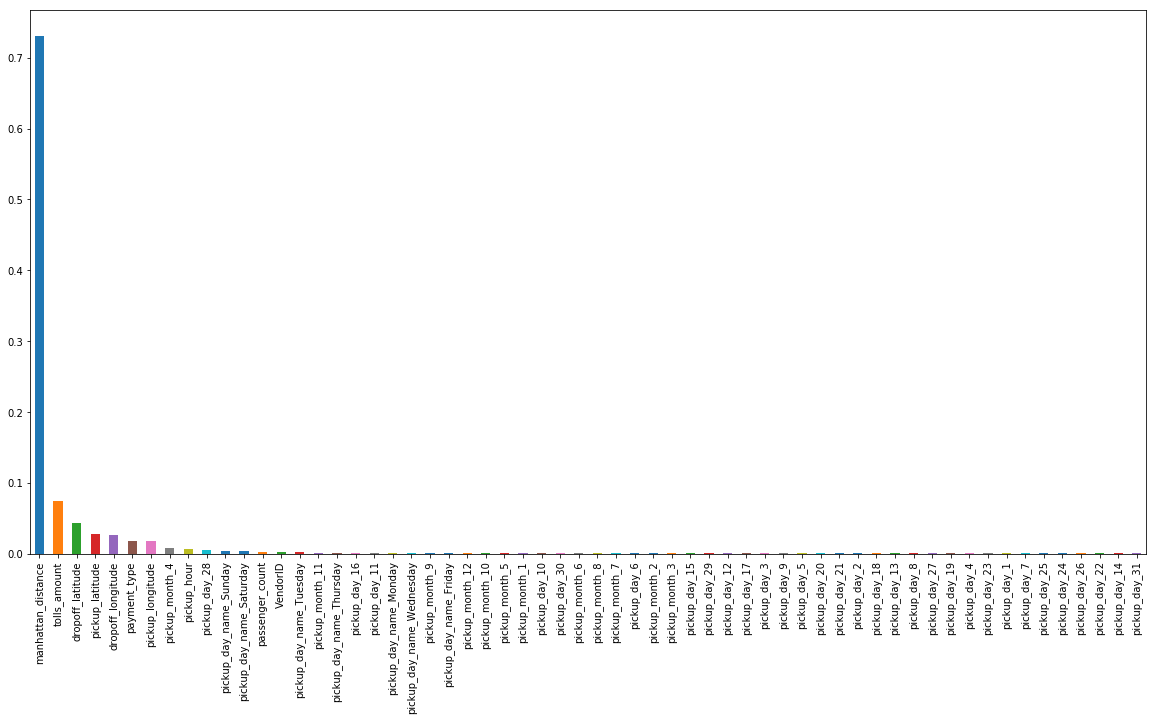

In [118]:
feat_imp = pd.Series(forest.feature_importances_, index=df2.drop("total_amount",axis = 1).columns,name = 'feature_importance').sort_values(ascending=False)
print(feat_imp)
feat_imp.plot.bar(figsize=(20,10))